In [1]:
# Description: This is a python program for finance (Python For Finance)
#              This program will show you how to compute portfolio simple returns,
#              get daily return and volatility.

In [2]:
# import the Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the Stock Symbol for the Portfolio 
# FAANG
stockSymbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [4]:
# GET the stock starting date
stockDate = '2013-01-01'

In [5]:
# Get todays date and format it in the form YYYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')

today

'2020-10-07'

In [6]:
# Get the number of asset in the portfolio
numAssets = len(stockSymbols)

print('you have ' + str(numAssets) + ' assets in you portfolio.')

you have 5 assets in you portfolio.


In [7]:
# Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks = stockSymbols, start = stockDate, end=today, col='Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
  return data

In [8]:
# Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.094694,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.878920,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.408764,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.312239,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.356150,13.880000,365.280823
...,...,...,...,...,...
2020-09-30,261.899994,3148.729980,115.809998,500.029999,1469.599976
2020-10-01,266.630005,3221.260010,116.790001,527.510010,1490.089966
2020-10-02,259.940002,3125.000000,113.019997,503.059998,1458.420044


In [15]:
# Create a function to visualize a portfolio 
def showGraph(stocks=stockSymbols, start = stockDate, end=today, col='Adj Close'):

  # Create a title for portfolio 
  title = 'Portfolio '+col+' Price History'

  # Get the stocks
  my_stocks = getMyPortfolio(stocks = stocks, start = start, end=end, col=col)

  # Give the Figure size
  plt.figure(figsize=(12.2, 4.5))

  # Loop through each stock and plot the price
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)

  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(col+ ' Prices USD($)', fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()

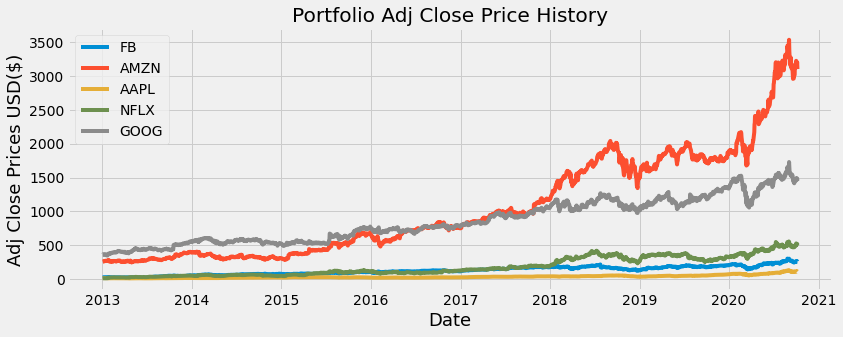

In [16]:
# Show the Adjusted Close Price
showGraph(stockSymbols)

In [19]:
# Calculate the simple returns
daily_simple_return = my_stocks.pct_change(1)

# Show the daily simple returns
daily_simple_return

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005883,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-09-30,0.000420,0.001224,0.015076,0.013273,0.000184
2020-10-01,0.018060,0.023035,0.008462,0.054957,0.013943
2020-10-02,-0.025091,-0.029883,-0.032280,-0.046350,-0.021254


In [21]:
# Show the Stocks correlation 
daily_simple_return.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.512590,0.445504,0.357601,0.565995
AMZN,0.512590,1.000000,0.443435,0.446471,0.610534
AAPL,0.445504,0.443435,1.000000,0.262814,0.527321
NFLX,0.357601,0.446471,0.262814,1.000000,0.423058
GOOG,0.565995,0.610534,0.527321,0.423058,1.000000


In [22]:
# Show the covariance matrix for simple returns
daily_simple_return.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000468,0.000214,0.000173,0.000225,0.000198
AMZN,0.000214,0.000372,0.000153,0.000250,0.000190
AAPL,0.000173,0.000153,0.000321,0.000137,0.000152
NFLX,0.000225,0.000250,0.000137,0.000845,0.000198
GOOG,0.000198,0.000190,0.000152,0.000198,0.000261


In [23]:
# Show the variance 
daily_simple_return.var()

Symbols
FB      0.000468
AMZN    0.000372
AAPL    0.000321
NFLX    0.000845
GOOG    0.000261
dtype: float64

In [24]:
# Print the standard deviation for daily simple returns
print("Stocks Volatility: ")
daily_simple_return.std()
# Higher volatility higher return
# Lower volatility lower the return

Stocks Volatility: 


Symbols
FB      0.021634
AMZN    0.019294
AAPL    0.017907
NFLX    0.029066
GOOG    0.016142
dtype: float64

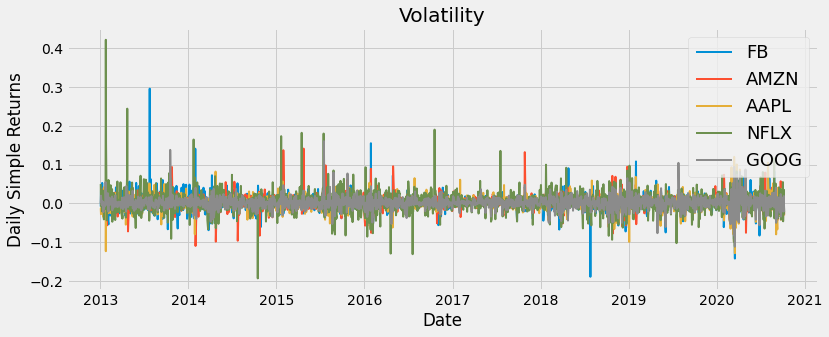

In [28]:
# Visualize the stocks dialy simple returns
plt.figure(figsize=(12, 4.5))


# Loop through each stocks and plot the simple returns
for c in daily_simple_return.columns.values:
  plt.plot(daily_simple_return.index, daily_simple_return[c], lw=2, label=c)

plt.legend(loc='upper right', fontsize=18)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show()

In [30]:
# Show the mean of the Daily Simple Return
dailyMeanSimpleReturn = daily_simple_return.mean()

# Print
print("Daily men simple return:")
print(dailyMeanSimpleReturn)

Daily men simple return:
Symbols
FB      0.001369
AMZN    0.001460
AAPL    0.001129
NFLX    0.002277
GOOG    0.000843
dtype: float64


In [31]:
# Calculate the Expected portfolio daily return
randomweights = np.array([0.4, 0.1, 0.3, 0.1, 0.1]) # 40% FB, 10% AMZN, 30% AAPL, 10% NFXL, 10% GOOG

portfolioSimpleReturn  = np.sum(dailyMeanSimpleReturn * randomweights)

# print the expected portfolio return
print("The daily expected portfolio return:",str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0013443483199099015


In [34]:
# Get the yearly simple return
print("Expected annualised portfolio simple return:" + str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return:0.34012012493720506


In [35]:
# Calculated the growth of the Investment
dailyCumlSimpleReturn = (daily_simple_return+1).cumprod() 

# Show the cumulative simple return
dailyCumlSimpleReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956797,1.055972,1.013896
...,...,...,...,...,...
2020-09-30,9.353571,12.237107,6.774617,38.041625,4.079111
2020-10-01,9.522500,12.518985,6.831944,40.132268,4.135984
2020-10-02,9.283572,12.144884,6.611408,38.272143,4.048079


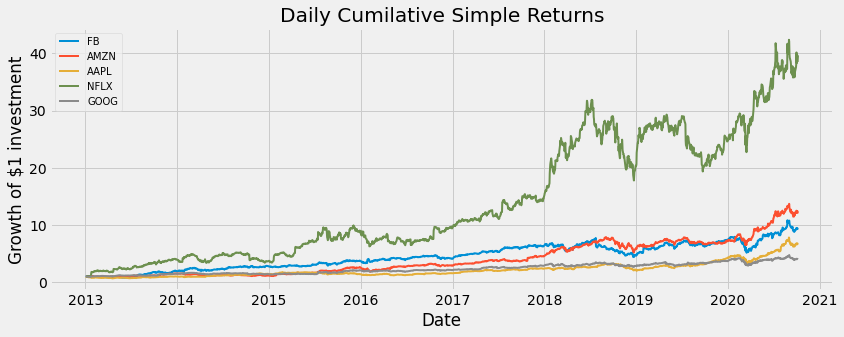

In [37]:
# Visualize Daily cumulative simple return

plt.figure(figsize=(12.5, 4.5))
for c in dailyCumlSimpleReturn.columns.values:
  plt.plot(dailyCumlSimpleReturn.index, dailyCumlSimpleReturn[c], lw=2, label=c)

plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumilative Simple Returns')
plt.show()